In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [2]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

Using TensorFlow backend.
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

In [4]:
from evaluate import plot_learning_curve, plot_accuracy_curve, load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

In [5]:
from data_gen import data
from run import characterize_data
from config import config

In [8]:
UUID = "cd3d835e-b48c-4182-b4e3-e952392b3860"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [6]:
SELECTIONS = eval(SELECTIONS)

# Learning Curve

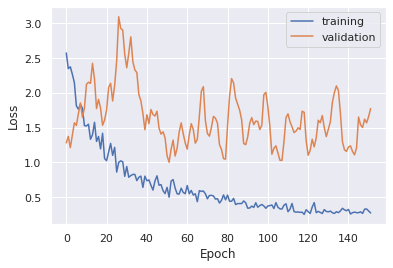

In [9]:
result = Result.query.filter(Result.uuid == UUID).first()
fig = plot_learning_curve(result)
fig.savefig("figures/learning_curves/{}-learning_curve.svg".format(UUID))

# Accuracy Trend

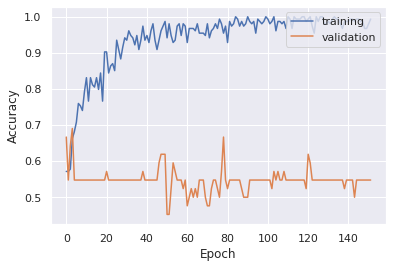

In [10]:
fig = plot_accuracy_curve(result)
fig.savefig("figures/accuracy/{}-accuracy.svg".format(UUID))

In [11]:
print("input form:", result.input_form)

input form: t1c-t2


In [12]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [13]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  0%|          | 0/167 [00:00<?, ?it/s]

Training points = 167
Benign: 79, Malignant: 88

Validation points = 46
Benign: 22, Malignant: 24

Testing points = 23
Benign: 11, Malignant: 12
china005
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  1%|          | 2/167 [00:00<00:25,  6.39it/s]

penn-031
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-65
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-65, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/chop-65-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno

  2%|▏         | 4/167 [00:01<00:36,  4.42it/s]

penn-006
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  3%|▎         | 5/167 [00:01<00:39,  4.14it/s]

chop-7
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  4%|▎         | 6/167 [00:02<01:04,  2.49it/s]

chop-36
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 7/167 [00:02<01:03,  2.53it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-55
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  5%|▍         | 8/167 [00:03<01:16,  2.08it/s]

chop-28
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  6%|▌         | 10/167 [00:03<00:51,  3.02it/s]

china157
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china083
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 11/167 [00:03<00:42,  3.65it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-22
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  8%|▊         | 13/167 [00:04<00:49,  3.12it/s]

china137
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china032
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  8%|▊         | 14/167 [00:04<00:39,  3.86it/s]

china138
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  9%|▉         | 15/167 [00:04<00:39,  3.83it/s]

chop-80
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 10%|▉         | 16/167 [00:05<00:48,  3.09it/s]

chop-114
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 10%|█         | 17/167 [00:06<01:10,  2.12it/s]

penn-075
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 11%|█▏        | 19/167 [00:07<01:14,  1.98it/s]

china006
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china073
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 20/167 [00:07<01:00,  2.42it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-024
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 13%|█▎        | 22/167 [00:08<00:43,  3.34it/s]

chop-29
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china125
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 24/167 [00:08<00:30,  4.71it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-037
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-33
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 25/167 [00:08<00:40,  3.46it/s]

Does this patient have T1C available? True
I'm doing the thing.
china015
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 26/167 [00:09<00:41,  3.41it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-046
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   0.000
Name: penn-046, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-046-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-046-t2-ima

 17%|█▋        | 28/167 [00:09<00:38,  3.64it/s]

chop-6
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 29/167 [00:10<00:45,  3.01it/s]

Does this patient have T1C available? True
I'm doing the thing.
china086
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 30/167 [00:10<00:40,  3.38it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-18
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 19%|█▊        | 31/167 [00:10<00:35,  3.85it/s]

chop-68
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 19%|█▉        | 32/167 [00:10<00:35,  3.82it/s]

china110
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 20%|█▉        | 33/167 [00:11<00:40,  3.28it/s]

china120
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 20%|██        | 34/167 [00:11<00:38,  3.49it/s]

penn-056
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 35/167 [00:11<00:39,  3.33it/s]

Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-056, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-056-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-056-t1c-imagingVolume.nrrd'

penn-001
Does this patient have T2 available? Tr

 22%|██▏       | 36/167 [00:12<00:44,  2.92it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-8
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 22%|██▏       | 37/167 [00:12<00:57,  2.24it/s]

china008
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 23%|██▎       | 38/167 [00:12<00:48,  2.67it/s]

chop-75
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 24%|██▍       | 40/167 [00:13<00:44,  2.87it/s]

china129
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china081
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 41/167 [00:14<00:42,  2.96it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-23
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 26%|██▌       | 43/167 [00:15<00:50,  2.48it/s]

china154
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-138
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▋       | 44/167 [00:15<00:41,  2.99it/s]

Does this patient have T1C available? True
I'm doing the thing.
china131
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 27%|██▋       | 45/167 [00:15<00:33,  3.63it/s]

penn-020
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china135
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 29%|██▊       | 48/167 [00:16<00:28,  4.25it/s]

penn-055
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-055, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-055-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-055-t

 30%|██▉       | 50/167 [00:16<00:25,  4.62it/s]

chop-101
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 31%|███       | 51/167 [00:16<00:25,  4.56it/s]

china078
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 31%|███       | 52/167 [00:16<00:29,  3.87it/s]

chop-129
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 32%|███▏      | 53/167 [00:17<00:48,  2.37it/s]

chop-9
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 32%|███▏      | 54/167 [00:19<01:34,  1.20it/s]

penn-014
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 33%|███▎      | 55/167 [00:19<01:17,  1.45it/s]

penn-005
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 34%|███▍      | 57/167 [00:20<00:58,  1.88it/s]

china020
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china060
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 35%|███▍      | 58/167 [00:21<00:50,  2.14it/s]

chop-69
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 35%|███▌      | 59/167 [00:21<00:51,  2.10it/s]

penn-079
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 36%|███▌      | 60/167 [00:21<00:43,  2.45it/s]

china107
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 37%|███▋      | 62/167 [00:22<00:30,  3.47it/s]

penn-038
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-038, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-038-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-038-t

 38%|███▊      | 63/167 [00:22<00:31,  3.31it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-20
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 64/167 [00:22<00:36,  2.82it/s]

Does this patient have T1C available? True
I'm doing the thing.
china092
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 65/167 [00:23<00:28,  3.54it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-130
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 40%|███▉      | 66/167 [00:25<01:29,  1.13it/s]

china150
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 40%|████      | 67/167 [00:25<01:10,  1.43it/s]

chop-60
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 41%|████      | 68/167 [00:26<01:00,  1.63it/s]

china011
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china011, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china011-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china011-t2-imagingVolume.nrrd'

chop-91
Does this patient have T2 available? T

 43%|████▎     | 71/167 [00:26<00:40,  2.38it/s]

china059
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
penn-008
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-008, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-008-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Er

 44%|████▍     | 74/167 [00:29<00:42,  2.18it/s]

penn-057
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-057, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-057-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-057-t

 45%|████▍     | 75/167 [00:29<00:34,  2.65it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-139
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 46%|████▌     | 76/167 [00:29<00:32,  2.77it/s]

china132
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 46%|████▌     | 77/167 [00:29<00:29,  3.03it/s]

chop-19
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 78/167 [00:30<00:29,  2.99it/s]

Does this patient have T1C available? True
I'm doing the thing.
china010
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 47%|████▋     | 79/167 [00:30<00:25,  3.39it/s]

china128
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 49%|████▊     | 81/167 [00:30<00:20,  4.27it/s]

china018
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-121
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 82/167 [00:31<00:21,  3.86it/s]

Does this patient have T1C available? True
I'm doing the thing.
china024
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china024, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china024-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china024-t2-ima

 51%|█████     | 85/167 [00:31<00:16,  4.88it/s]

Does this patient have T1C available? True
I'm doing the thing.
china075
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 51%|█████▏    | 86/167 [00:31<00:16,  4.91it/s]

china103
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 52%|█████▏    | 87/167 [00:31<00:17,  4.62it/s]

china017
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-143
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 53%|█████▎    | 89/167 [00:32<00:20,  3.80it/s]

chop-54
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 55%|█████▌    | 92/167 [00:34<00:44,  1.67it/s]

chop-100
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-100, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/chop-100-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/chop-100-t2-imagingVolume.nrrd'

china054
Does this patient have T2 available? 

 56%|█████▌    | 93/167 [00:35<00:38,  1.90it/s]

chop-106
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▋    | 94/167 [00:35<00:33,  2.16it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-125
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 57%|█████▋    | 96/167 [00:38<01:01,  1.15it/s]

china047
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china045
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 97/167 [00:38<00:45,  1.53it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-023
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-023, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-023-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-023-t2-ima

 59%|█████▉    | 99/167 [00:39<00:35,  1.90it/s]

china064
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 60%|█████▉    | 100/167 [00:39<00:28,  2.31it/s]

china013
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 60%|██████    | 101/167 [00:39<00:25,  2.61it/s]

china148
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 62%|██████▏   | 103/167 [00:39<00:17,  3.57it/s]

china016
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china101
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 104/167 [00:40<00:16,  3.73it/s]

Does this patient have T1C available? True
I'm doing the thing.
china070
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 63%|██████▎   | 105/167 [00:40<00:14,  4.25it/s]

china014
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 65%|██████▍   | 108/167 [00:40<00:11,  5.06it/s]

china096
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china096, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china096-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china096-t2-imagingVolume.nrrd'

china087
Does this patient have T2 available? 

 65%|██████▌   | 109/167 [00:41<00:12,  4.55it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-110
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 66%|██████▌   | 110/167 [00:42<00:33,  1.71it/s]

penn-047
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 111/167 [00:43<00:36,  1.54it/s]

Does this patient have T1C available? True
I'm doing the thing.
china140
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 112/167 [00:43<00:29,  1.89it/s]

Does this patient have T1C available? True
I'm doing the thing.
china142
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 113/167 [00:43<00:26,  2.06it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-013
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 68%|██████▊   | 114/167 [00:46<00:55,  1.06s/it]

penn-021
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 69%|██████▉   | 115/167 [00:46<00:41,  1.24it/s]

china063
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 69%|██████▉   | 116/167 [00:46<00:32,  1.59it/s]

china082
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china068
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 72%|███████▏  | 120/167 [00:47<00:16,  2.78it/s]

chop-50
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-50, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/chop-50-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/chop-50-t2-imagingVolume.nrrd'

china108
Does this patient have T2 available? True

 73%|███████▎  | 122/167 [00:48<00:25,  1.79it/s]

china136
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-103
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 123/167 [00:49<00:20,  2.19it/s]

Does this patient have T1C available? True
I'm doing the thing.
china012
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 124/167 [00:49<00:16,  2.67it/s]

Does this patient have T1C available? True
I'm doing the thing.
china095
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china095, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china095-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china095-t2-ima

 76%|███████▌  | 127/167 [00:49<00:10,  3.93it/s]

china155
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china151
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 128/167 [00:49<00:09,  3.96it/s]

Does this patient have T1C available? True
I'm doing the thing.
china130
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 129/167 [00:50<00:08,  4.28it/s]

Does this patient have T1C available? True
I'm doing the thing.
china062
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 130/167 [00:50<00:09,  3.96it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-144
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 131/167 [00:50<00:11,  3.11it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-109
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 132/167 [00:51<00:09,  3.60it/s]

Does this patient have T1C available? True
I'm doing the thing.
china037
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 133/167 [00:51<00:09,  3.70it/s]

Does this patient have T1C available? True
I'm doing the thing.
china003
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 134/167 [00:51<00:08,  4.06it/s]

Does this patient have T1C available? True
I'm doing the thing.
china124
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 135/167 [00:51<00:07,  4.22it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-118
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 81%|████████▏ | 136/167 [00:52<00:10,  2.91it/s]

china123
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 82%|████████▏ | 137/167 [00:52<00:11,  2.72it/s]

china034
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 83%|████████▎ | 139/167 [00:53<00:08,  3.37it/s]

china043
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china121
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 84%|████████▍ | 141/167 [00:53<00:06,  3.93it/s]

penn-071
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china109
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china139
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 86%|████████▌ | 144/167 [00:54<00:04,  4.62it/s]

china106
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-117
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 145/167 [00:54<00:04,  5.40it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-115
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 146/167 [00:54<00:04,  4.60it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-127
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True

 88%|████████▊ | 147/167 [00:54<00:03,  5.29it/s]


I'm doing the thing.
china004
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 89%|████████▊ | 148/167 [00:54<00:03,  5.33it/s]

chop-122
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 89%|████████▉ | 149/167 [00:55<00:06,  2.73it/s]

penn-052
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 90%|████████▉ | 150/167 [00:56<00:07,  2.28it/s]

penn-009
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-009, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-009-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-009-t2-imagingVolume.nrrd'

chop-93
Does this patient have T2 available? T

 91%|█████████ | 152/167 [00:56<00:05,  2.83it/s]

china097
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china097, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china097-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china097-t2-imagingVolume.nrrd'

china084
Does this patient have T2 available? 

 92%|█████████▏| 154/167 [00:56<00:03,  3.46it/s]

china115
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 93%|█████████▎| 156/167 [00:57<00:02,  4.03it/s]

china025
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china074
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 94%|█████████▍| 157/167 [00:57<00:02,  4.16it/s]

china033
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 95%|█████████▍| 158/167 [00:57<00:02,  4.30it/s]

chop-96
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 95%|█████████▌| 159/167 [00:57<00:01,  4.22it/s]

china126
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 96%|█████████▌| 160/167 [00:58<00:01,  4.17it/s]

penn-068
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-068, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-068-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-068-t

 98%|█████████▊| 163/167 [00:58<00:00,  4.84it/s]

penn-054
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china105
Does this patient have T2 available? True

 98%|█████████▊| 164/167 [00:58<00:00,  5.06it/s]


I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
penn-022
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.606
outcome   1.000
Name: penn-022, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-022-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/prepro

 99%|█████████▉| 166/167 [00:59<00:00,  5.69it/s]

Does this patient have T1C available? True
I'm doing the thing.
china122
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 0/46 [00:00<?, ?it/s]

Does this patient have T1C available? True
I'm doing the thing.
china065
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  4%|▍         | 2/46 [00:00<00:07,  5.63it/s]

china156
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china007
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-116
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  9%|▊         | 4/46 [00:01<00:12,  3.36it/s]

chop-72
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 11%|█         | 5/46 [00:01<00:11,  3.47it/s]

penn-015
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 15%|█▌        | 7/46 [00:02<00:09,  4.15it/s]

china051
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china143
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 8/46 [00:02<00:08,  4.57it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-67
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 22%|██▏       | 10/46 [00:02<00:08,  4.06it/s]

china149
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
penn-039
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 11/46 [00:03<00:08,  4.15it/s]

Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-039, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-039-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-039-t1c-imagingVolume.nrrd'

china076
Does this patient have T2 available? Tr

 26%|██▌       | 12/46 [00:03<00:09,  3.65it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-041
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 13/46 [00:04<00:11,  2.89it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-76
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 33%|███▎      | 15/46 [00:04<00:10,  2.94it/s]

china061
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-131
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 16/46 [00:05<00:13,  2.22it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-47
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 17/46 [00:05<00:12,  2.37it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-97
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 41%|████▏     | 19/46 [00:07<00:18,  1.49it/s]

chop-10
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
penn-070
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 20/46 [00:08<00:19,  1.34it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-045
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 21/46 [00:09<00:16,  1.50it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-48
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 48%|████▊     | 22/46 [00:10<00:20,  1.15it/s]

chop-92
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 52%|█████▏    | 24/46 [00:11<00:11,  1.92it/s]

china094
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china127
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 25/46 [00:11<00:09,  2.28it/s]

Does this patient have T1C available? True
I'm doing the thing.
china036
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-53
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 27/46 [00:11<00:07,  2.69it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-98
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 28/46 [00:12<00:06,  2.85it/s]

Does this patient have T1C available? True
I'm doing the thing.
chop-94
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 63%|██████▎   | 29/46 [00:12<00:08,  1.97it/s]

china029
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
penn-010
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-010, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-010-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Er

 70%|██████▉   | 32/46 [00:13<00:05,  2.60it/s]

china102
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china102, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china102-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china102-t2-imagingVolume.nrrd'

penn-033
Does this patient have T2 available? 

 76%|███████▌  | 35/46 [00:13<00:03,  3.31it/s]

china098
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.605
outcome   1.000
Name: china098, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china098-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china098-t2-imagingVolume.nrrd'

chop-49
Does this patient have T2 available? T

 80%|████████  | 37/46 [00:14<00:02,  3.60it/s]

china111
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china111, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china111-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china111-t2-imagingVolume.nrrd'

china042
Does this patient have T2 available? 

 85%|████████▍ | 39/46 [00:14<00:01,  4.40it/s]

penn-002
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 89%|████████▉ | 41/46 [00:14<00:01,  4.57it/s]

china116
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
china044
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████▏| 42/46 [00:14<00:00,  4.52it/s]

Does this patient have T1C available? True
I'm doing the thing.
china009
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 96%|█████████▌| 44/46 [00:15<00:00,  5.06it/s]

china071
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-83
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 98%|█████████▊| 45/46 [00:15<00:00,  3.10it/s]

chop-95
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  0%|          | 0/23 [00:00<?, ?it/s]

china145
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  4%|▍         | 1/23 [00:00<00:05,  4.07it/s]

chop-137
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


  9%|▊         | 2/23 [00:00<00:06,  3.27it/s]

chop-89
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 13%|█▎        | 3/23 [00:00<00:05,  3.40it/s]

penn-067
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-067, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-067-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 402, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-067-t

 22%|██▏       | 5/23 [00:01<00:05,  3.25it/s]

chop-21
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 6/23 [00:02<00:05,  2.96it/s]

Does this patient have T1C available? True
I'm doing the thing.
china093
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 7/23 [00:02<00:05,  3.15it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-026
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 8/23 [00:02<00:04,  3.54it/s]

Does this patient have T1C available? True
I'm doing the thing.
china114
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 39%|███▉      | 9/23 [00:02<00:04,  3.24it/s]

chop-123
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 10/23 [00:03<00:05,  2.34it/s]

Does this patient have T1C available? True
I'm doing the thing.
penn-011
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 48%|████▊     | 11/23 [00:04<00:05,  2.25it/s]

penn-065
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 52%|█████▏    | 12/23 [00:05<00:08,  1.31it/s]

china113
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 57%|█████▋    | 13/23 [00:05<00:06,  1.66it/s]

penn-003
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-003, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-003-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-003-t2-imagingVolume.nrrd'

china053
Does this patient have T2 available? 

 70%|██████▉   | 16/23 [00:06<00:03,  2.15it/s]

Does this patient have T1C available? True
I'm doing the thing.
china144
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.
chop-128
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 78%|███████▊  | 18/23 [00:06<00:02,  2.42it/s]

china077
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 83%|████████▎ | 19/23 [00:07<00:01,  2.79it/s]

china089
Does this patient have T2 available? True
I'm doing the thing.
Does this patient have T1C available? True
I'm doing the thing.


 96%|█████████▌| 22/23 [00:07<00:00,  3.93it/s]

china048
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china048, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china048-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 383, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china048-t2-imagingVolume.nrrd'

china119
Does this patient have T2 available? 

100%|██████████| 23/23 [00:07<00:00,  3.02it/s]


Does this patient have T1C available? True
I'm doing the thing.


In [14]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))

training N: 147
validation N: 40
test N: 20


In [15]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training 1.0: 77
validation 1.0: 19
test 1.0: 10


In [16]:
model = load(MODEL)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [17]:
model

# Train

In [18]:
results = get_results(model, train)

In [19]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [20]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.4761904776096344
Loss: 1.1429896354675293


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.476,43,27,50,27,0.614,0.351,0.462,0.500,0.649,0.386,0.538,0.482,0.464
1.000,0.476,27,43,27,50,0.351,0.614,0.500,0.462,0.386,0.649,0.500,0.482,0.464


## Train confusion matrix

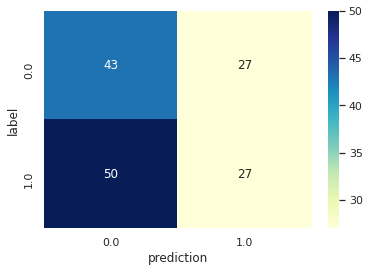

In [21]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train ROC curve

No handles with labels found to put in legend.


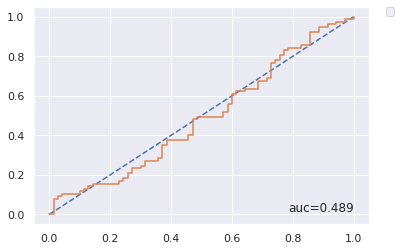

In [22]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

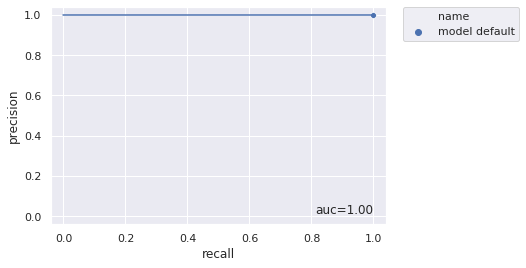

In [20]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Validation

In [44]:
results = get_results(model, validation)

In [45]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [46]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.6153846383094788
Loss: 4.125478744506836


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.513,8,12,8,11,0.421,0.600,0.500,0.522,0.400,0.579,0.500,0.511,0.503
1.000,0.513,12,8,11,8,0.600,0.421,0.522,0.500,0.579,0.400,0.478,0.511,0.503


## Validation confusion matrix

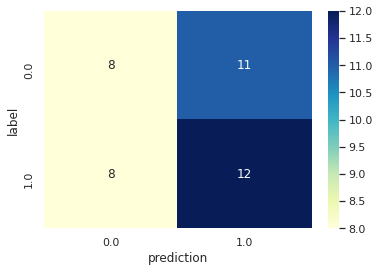

In [47]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation ROC curve

No handles with labels found to put in legend.


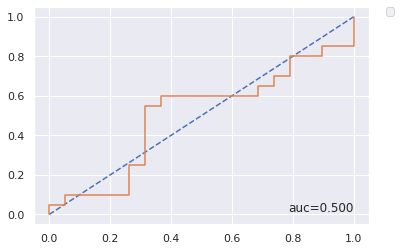

In [48]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

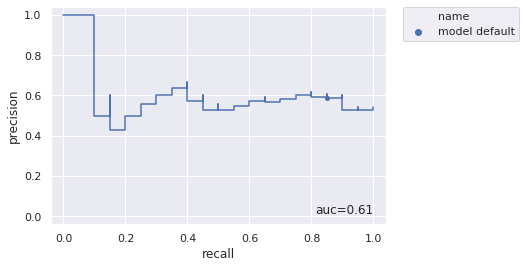

In [26]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Test

In [23]:
results = get_results(model, test)

In [25]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
names = test.names
test_results = [['PatientID','True label','Predicted label','Probability']]
index = 0
for name in names:
    test_results.append([name, labels[index], predictions[index], probabilities[index]])
    index += 1
df = pandas.DataFrame(test_results)
df.to_csv("output/test_results/{}-{}.csv".format(UUID, result.model), header=False, index=False)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

## Test statistics

In [51]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.5555555820465088
Loss: 4.632849216461182


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.556,8,7,7,5,0.615,0.500,0.533,0.583,0.500,0.385,0.467,0.558,0.555
1.000,0.556,7,8,5,7,0.500,0.615,0.583,0.533,0.385,0.500,0.417,0.558,0.555


## Test confusion matrix

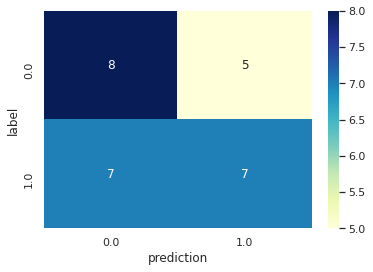

In [52]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test ROC curve

No handles with labels found to put in legend.


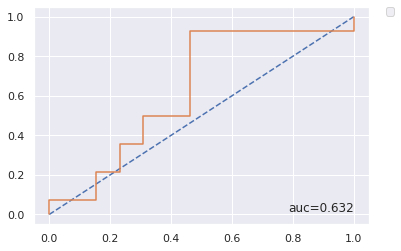

In [53]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

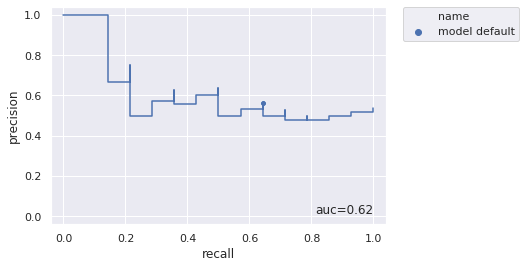

In [33]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

In [33]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

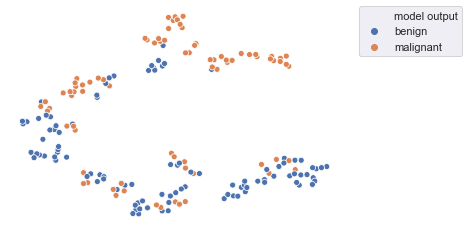

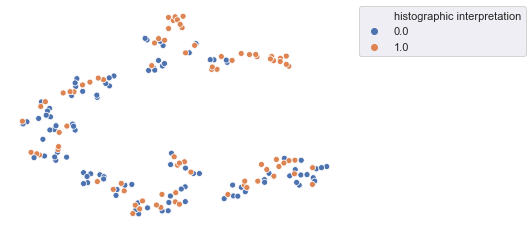

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-model-output-tsne.svg'

In [34]:
if result.input_form != "features": 
    layer = "dense_1"
    if deep_top: 
        layer = "dense_3"
    tsne_dataset = train
    tsne_dataset.reset()
    fieldnames = ["histographic interpretation"]
    tsne_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, tsne_dataset))]
    figs = plot_tsne(
        model, 
        layer, 
        tsne_dataset, 
        [tsne_results, tsne_dataset.labels], 
        fieldnames=["model output", *fieldnames], 
        perplexity=TSNE_PERPLEXITY,
    )
    for i, field in enumerate(["model output", *fieldnames]): 
        figs[i].savefig("figures/{}-{}-{}-tsne.svg".format(result.description, result.input_form, field.replace(" ", "-")), bbox_inches = "tight")
    tsne_dataset.reset()

# Grad Cam

In [ ]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [ ]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
if grad_cam_dataset.parameters["t1"]: 
    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
    plt.show()
if grad_cam_dataset.parameters["t2"]: 
    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, penultimate_layer="res5c_branch2c_t2", layer=grad_cam_layer)
    plt.show()

In [2]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

if SELECTIONS == None: 
    SELECTIONS = dict()

if grad_cam_dataset.parameters["t1"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t1
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])            
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
        fig.show()

if grad_cam_dataset.parameters["t2"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t2
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, penultimate_layer="res5c_branch2c_t2",include_label=False, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
        fig.show()

NameError: name 'test' is not defined

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')